In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

'Colab Notebooks'       models
'Colab Notebooks (1)'  'ResNet - Female vs Male.ipynb'
 fairfaceclahe.zip      Resume.pdf
 fairfacedataset.zip    sample.gdoc
 fairfaceequ.zip        Untitled2.m
 fairfaceretinex.zip    Untitled.m
 fairfacesqi.zip       'Untitled spreadsheet.gsheet'
'Getting started.pdf'


In [ ]:
!fairfaceequ ls

/bin/bash: fairfaceequ: command not found


In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
!unzip fairfacedataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: fairfacedataset/Validation/Male/1409.jpg  
  inflating: fairfacedataset/Validation/Male/141.jpg  
  inflating: fairfacedataset/Validation/Male/1410.jpg  
  inflating: fairfacedataset/Validation/Male/1412.jpg  
  inflating: fairfacedataset/Validation/Male/1413.jpg  
  inflating: fairfacedataset/Validation/Male/1414.jpg  
  inflating: fairfacedataset/Validation/Male/1416.jpg  
  inflating: fairfacedataset/Validation/Male/1420.jpg  
  inflating: fairfacedataset/Validation/Male/1421.jpg  
  inflating: fairfacedataset/Validation/Male/1422.jpg  
  inflating: fairfacedataset/Validation/Male/1430.jpg  
  inflating: fairfacedataset/Validation/Male/1432.jpg  
  inflating: fairfacedataset/Validation/Male/1434.jpg  
  inflating: fairfacedataset/Validation/Male/1435.jpg  
  inflating: fairfacedataset/Validation/Male/1436.jpg  
  inflating: fairfacedataset/Validation/Male/1437.jpg  
  inflating: fairfacedataset/Validation/Male/1438.jpg 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import os
import random
import numpy as np

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
train_transforms = transforms.Compose([
                           transforms.RandomHorizontalFlip(),
                           transforms.RandomRotation(10),
                           transforms.RandomCrop((224, 224), pad_if_needed=True),
                           transforms.ToTensor(),
                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                       ])

test_transforms = transforms.Compose([
                           transforms.CenterCrop((224, 224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                       ])

In [ ]:
train_data = datasets.ImageFolder('fairfacedataset/Training', train_transforms)
valid_data = datasets.ImageFolder('fairfacedataset/Validation', test_transforms)
#test_data = datasets.ImageFolder('fairfaceequ/Validation/Male/1.jpg', test_transforms)

#import os

#print(len(os.listdir('data/dogs-vs-cats/train')))

#n_train_examples = int(len(train_data)*0.9)
#n_valid_examples = n_test_examples = len(train_data) - n_train_examples

#train_data, valid_data = torch.utils.data.random_split(train_data, [n_train_examples, n_valid_examples])
#train_data, test_data = torch.utils.data.random_split(train_data, [n_train_examples-n_valid_examples, n_test_examples])

In [ ]:
print(valid_data.class_to_idx)

{'Female': 0, 'Male': 1}


https://github.com/facebook/fb.resnet.torch/issues/180
https://github.com/bamos/densenet.pytorch/blob/master/compute-cifar10-mean.py

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
#print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 85902
Number of validation examples: 10836


In [ ]:
BATCH_SIZE = 64

train_iterator = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
valid_iterator = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE)
#test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

https://discuss.pytorch.org/t/why-does-the-resnet-model-given-by-pytorch-omit-biases-from-the-convolutional-layer/10990/4
https://github.com/kuangliu/pytorch-cifar/blob/master/models/resnet.py

In [ ]:
device = torch.device('cuda')

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
'''
# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD


class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(in_features=512, out_features=2).to(device)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
    
    # defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
'''

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torch.optim import lr_scheduler


num_ftrs = model.fc.in_features
model.fc = nn.Linear(512, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
def calculate_accuracy(fx, y):
    preds = fx.max(1, keepdim=True)[1]
    correct = preds.eq(y.view_as(preds)).sum()
    acc = correct.float()/preds.shape[0]
    return acc

In [ ]:
def train(model, device, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        fx = model(x)
        
        loss = criterion(fx, y)
        
        acc = calculate_accuracy(fx, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, device, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            fx = model(x)

            loss = criterion(fx, y)

            acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
EPOCHS = 50
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'Original-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% |')

| Epoch: 01 | Train Loss: 0.562 | Train Acc: 70.14% | Val. Loss: 0.475 | Val. Acc: 76.93% |
| Epoch: 02 | Train Loss: 0.426 | Train Acc: 79.72% | Val. Loss: 0.379 | Val. Acc: 82.03% |
| Epoch: 03 | Train Loss: 0.369 | Train Acc: 82.87% | Val. Loss: 0.335 | Val. Acc: 84.38% |
| Epoch: 04 | Train Loss: 0.334 | Train Acc: 84.79% | Val. Loss: 0.308 | Val. Acc: 85.80% |
| Epoch: 05 | Train Loss: 0.310 | Train Acc: 85.99% | Val. Loss: 0.289 | Val. Acc: 87.05% |
| Epoch: 06 | Train Loss: 0.291 | Train Acc: 86.94% | Val. Loss: 0.276 | Val. Acc: 87.69% |
| Epoch: 07 | Train Loss: 0.279 | Train Acc: 87.58% | Val. Loss: 0.265 | Val. Acc: 88.29% |
| Epoch: 08 | Train Loss: 0.269 | Train Acc: 88.19% | Val. Loss: 0.258 | Val. Acc: 88.80% |
| Epoch: 09 | Train Loss: 0.257 | Train Acc: 88.71% | Val. Loss: 0.252 | Val. Acc: 88.76% |
| Epoch: 10 | Train Loss: 0.250 | Train Acc: 89.00% | Val. Loss: 0.244 | Val. Acc: 89.10% |
| Epoch: 11 | Train Loss: 0.242 | Train Acc: 89.31% | Val. Loss: 0.240 | Val. Ac

In [ ]:
test_data = datasets.ImageFolder('fairfacedataset/Validation', test_transforms)


test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
model.load_state_dict(torch.load('models/Original-ResentFT-males-vs-females.pt'))

test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:05.2f}% |')

| Test Loss: 0.204 | Test Acc: 91.24% |


In [ ]:
import matplotlib.pyplot as plt
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,10)
plt.savefig('loss_curve.png')
plt.show()

In [ ]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('accuracy_curve.png')
plt.show()

In [ ]:
print(optimizer.state_dict())

f = open( 'test_optimizer_state_dict.txt', 'w' )
f.write( 'test_optimizer_state_dict = ' + repr(optimizer.state_dict()) + '\n' )
f.close()

In [ ]:
#print(model.state_dict())

f = open( 'test_model_state_dict.txt', 'w' )
f.write( 'test_model_state_dict = ' + repr(model.state_dict()) + '\n' )
f.close()

In [ ]:
dict = {'one': 1, 'two': 2}
f = open( 'test123.txt', 'w' )
f.write( 'dict = ' + repr(dict) + '\n' )
f.close()

In [ ]:
print(history[:,3:4])
flat_list = [item for sublist in history[:,3:4] for item in sublist]

In [ ]:
best_acc=max(flat_list)
print(best_acc)

In [ ]:
#trial1 = torch.load('epoch_60.pt')
#print(trial1)
#print(model)
import shutil
def save_checkpoint123(state123, is_best123, filename123='checkpoint.pth.tar'):
    torch.save(state123, filename123)
    if is_best123:
        shutil.copyfile(filename123, 'model_best.pth.tar')
        
save_checkpoint123({
            'epoch': epoch + 1,
            'arch': 'resnet50',
            'state_dict': model.state_dict(),
            'best_prec1': best_acc,
            'optimizer' : optimizer.state_dict(),
            'all_history': history,
            'exp_lr_scheduler_dict' : exp_lr_scheduler.state_dict(),
        }, True)

In [ ]:
resume = 'model_best.pth.tar'
if resume:
        if os.path.isfile(resume):
            print("=> loading checkpoint '{}'".format(resume))
            checkpoint = torch.load(resume)
            start_epoch = checkpoint['epoch']
            best_prec1 = checkpoint['best_prec1']
            model.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            all_history = (checkpoint['all_history']).tolist()
            exp_lr_scheduler = checkpoint['exp_lr_scheduler_dict']
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(resume, checkpoint['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.resume))

In [ ]:
print(start_epoch)
print(all_history)
history = all_history

In [ ]:
EPOCHS = 5
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'Resnet50_face_recognition_v1.pt')

best_valid_loss = 1.663

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
#history = []
for epoch in range(start_epoch,start_epoch+EPOCHS):
    epoch_start = time.time()
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    history.append([train_loss, valid_loss, train_acc, valid_acc])
    epoch_end = time.time()
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% | Time: {epoch_end-epoch_start:.4f}s |')
    

In [ ]:
model.load_state_dict(torch.load('models/Resnet50_face_recognition_v1.pt'))
test_data = datasets.ImageFolder(dataset+'\\validation', test_transforms)
class_names = test_data.classes

dataloaders = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
nb_classes = 460


confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

In [ ]:
print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))
Ind_acc = confusion_matrix.diag()/confusion_matrix.sum(1)
print("Female : ", float(Ind_acc[0]))s
print("Male : ", float(Ind_acc[1]))
TN = int(confusion_matrix[0][0])
FN = int(confusion_matrix[0][1])
FP = int(confusion_matrix[1][0])
TP = int(confusion_matrix[1][1])

In [ ]:
FPR = 0
FNR = 0
TPR = 0
TNR = 0
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TPR = 1 - FNR
TNR = 1 - FPR
Overall_acc = (TPR + TNR)/2
print("Overall Accuracy : ", Overall_acc)
print("Female : ", float(Ind_acc[0]))
print("Male : ", float(Ind_acc[1]))
print("FPR : ", FNR)
print("FNR : ", FPR)

In [ ]:
    model.eval()
    num_correct = 0 
    num_examples = 0
    for batch in val_loader:
        inputs, targets = batch
        inputs = inputs.to(device)
        output = model(inputs)
        targets = targets.to(device)
        loss = loss_fn(output,targets) 
        valid_loss += loss.data.item() * inputs.size(0)
        correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
        num_correct += torch.sum(correct).item()
        num_examples += correct.shape[0]
    valid_loss /= len(val_loader.dataset)
 
    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
    valid_loss, num_correct / num_examples))

In [ ]:
summary(model)

In [ ]:
print(model)

In [ ]:
data_transforms = {
    'test': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['test', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['6-10', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['6-10', 'val']}
class_names = image_datasets['val'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model.load_state_dict(torch.load('models/Original-ResentFT-males-vs-females.pt'))
test_data = datasets.ImageFolder('fairfacedataset/Validation', test_transforms)
class_names = test_data.classes

dataloaders = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
nb_classes = 2


confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[4632.,  472.],
        [ 475., 5257.]])


In [ ]:
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([0.9075, 0.9171])


In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

def visualize_model(model, num_images=22):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
           # print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(22)))

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                print('GroudthTruth: ',class_names[labels[j]])
                ax.set_title('Predicted: {}'.format(class_names[preds[j]]))
               
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

GroudthTruth:  Female


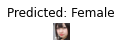

GroudthTruth:  Female


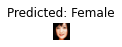

GroudthTruth:  Female


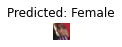

GroudthTruth:  Female


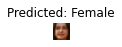

GroudthTruth:  Female


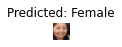

GroudthTruth:  Female


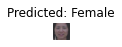

GroudthTruth:  Female


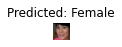

GroudthTruth:  Female


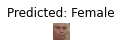

GroudthTruth:  Female


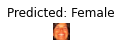

GroudthTruth:  Female


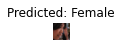

GroudthTruth:  Female


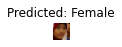

GroudthTruth:  Female


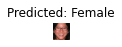

GroudthTruth:  Female


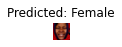

GroudthTruth:  Female


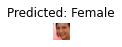

GroudthTruth:  Female


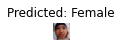

GroudthTruth:  Female


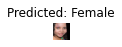

GroudthTruth:  Female


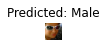

GroudthTruth:  Female


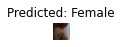

GroudthTruth:  Female


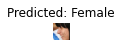

GroudthTruth:  Female


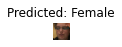

GroudthTruth:  Female


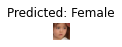

GroudthTruth:  Female


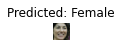

In [ ]:
out = torchvision.utils.make_grid(inputs)

visualize_model(model)
plt.ioff()
plt.show()